# **Introduction to Logistic Regression**
---

by [Olabanji Olaniyan](https://banjiola.github.io/Olabanji-Olaniyan/)

Logistic Regression is a discriminative supervised machine learning model that is used to predict a qualitative response. Logistic Regression does this by modelling the probability that a datapoint belongs to a particular category. That is, given that we have a set of `p` predictors/features $x_1,x_2,\ldots, x_p$, we want to estimate the probability that an instance $x^i \in \mathbb{R^{n\times p}}$ belongs to a category e.g the probability that a patient has cancer ot not. `n` number of datpoints in the trainset.

Discriminative and generative classifiers are different frameworks for building a machine learning model.
1. **Discriminative classifier**: These classifiers are primarily focused on learning how to distinguish between classes without modelling how the data was created. They just try to learn the boundary or hyperplane that separates the classes based on features, e.g such that if one of the features "neatly separates the classes, the model is okay with that feature".  
    
    - Logistic Regression
    - SVM
    - Tree-based methods

2. **Generative Classifier**: Has a goal (loosely speaking) of understanding what features make up a class so that it can generate datapoints of such a class.

    - Naive Bayes
    - Hidden Markov Models

## **How does it Work?**
For most supervised machine learning algorithms, the general intuition is that we build a model that maps the features of our dataset to the target variable. Afterwards, we use these models to make predictions. If our predictions are accurate, we are happy, but if they are inaccurate, then we change the parameters of the model we created. We can do this by optimising a particular cost function using an optimisation algorithm.

1. *How do we know if our model is doing well?* 
 *`Cost Function`*. A loss function tells us how well our model is doing on the training data. The problem we are facing is a minimisation problem as we are trying to find parameters of our models that will minimise our Loss function. For logistic regression, the loss function is `CrossEntropy`.

2. *How do we minimise the Loss function?* 
 We use an optimisation algorithm such as Gradient Descent.
 Check out my short article on the three types of gradient descent. https://medium.com/@banjiolaniyan123/types-of-gradient-descent-75f8f861c575

Loss and cost function are used interchangeably, but the loss function is the performance of our model for one instance, while the cost function is the performance of our model on all the training instances.

## **Cross-Entropy Loss Function**
---

As discussed previously, the loss function for logistic regression is the cross-entropy function, and it is used to check how close our predictions are to the actual target variable. It is mathematically expressed as: 

$$
J(\theta) = \begin{cases}
-log (\hat{y}) & \text{if y = 1}\\
-log (1 - \hat{y}) & \text{if y = 0}
\end{cases}
$$

Where 
- $\theta$: the parameters of the model that gives us $\hat{y}$.
- $\hat{y}$: Estimated probability that an instance belongs to class 1.

The function can be combined as follows.
$
J(\theta) = -y log \hat{y} + [(1-y)log  (1 -\hat{y})]
$

Where 

- $y$: Actual class of datapoint. 
- $\hat{y}$: Estimated probability an instance belongs to class 1

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# for reproducibility
np.random.seed(70)
random_state = 70

In [2]:
# implementation of CrossEntropy loss function

def L_0(y_hat):
    """
    Loss function for when the actual_label y = 0
    """
    return -np.log(1-y_hat)

def L_1(y_hat):
    """
    Loss function for when the actual_label = 1
    """
    return -np.log(y_hat)


# Combination of the formula

def cross_entropy(y, y_hat):
    """
    Loss function for when the actual_label y = 0

    y: actual vals 1,0
    """
    return -(y*np.log(y_hat)) -(1-y)*np.log(1-y_hat)


In [3]:
# now we are simulating 20 predictions between (0, 1) to show the behaviours of both functions and highlight its convex nature.  
# simulated prediction
y_hat = np.linspace(0.1,0.99,20) 

# loss for class 0 (y=0) using cross entropy
loss_0 = L_0(y_hat)
# loss for class 1 (y=1) using cross entropy
loss_1 = L_1(y_hat)

# create actual labels
y_true_0 = np.zeros(len(y_hat))
y_true_1 = np.ones(len(y_hat))


# create dataframes to show values of losses for each category
df_0 = pd.DataFrame(data = {
    "estimated_probability":y_hat,
    "actual_class(0)": y_true_0,
    "calculated_loss": loss_0}).sort_values(by='calculated_loss').reset_index(drop=True)

df_1 = pd.DataFrame(data = {
    "estimated_probability":y_hat,
    "actual_class(1)": y_true_1,
    "calculated_loss": loss_1}).sort_values(by='calculated_loss').reset_index(drop=True)

print("Class 0")
print('='*50)
print(df_0)
print('='*50)


Class 0
    estimated_probability  actual_class(0)  calculated_loss
0                0.100000              0.0         0.105361
1                0.146842              0.0         0.158811
2                0.193684              0.0         0.215280
3                0.240526              0.0         0.275130
4                0.287368              0.0         0.338791
5                0.334211              0.0         0.406782
6                0.381053              0.0         0.479735
7                0.427895              0.0         0.558432
8                0.474737              0.0         0.643856
9                0.521579              0.0         0.737264
10               0.568421              0.0         0.840305
11               0.615263              0.0         0.955196
12               0.662105              0.0         1.085021
13               0.708947              0.0         1.234251
14               0.755789              0.0         1.409725
15               0.802632       

In [4]:
print("Class 1")
print('='*50)
print(df_1)

Class 1
    estimated_probability  actual_class(1)  calculated_loss
0                0.990000              1.0         0.010050
1                0.943158              1.0         0.058522
2                0.896316              1.0         0.109462
3                0.849474              1.0         0.163138
4                0.802632              1.0         0.219859
5                0.755789              1.0         0.279992
6                0.708947              1.0         0.343974
7                0.662105              1.0         0.412331
8                0.615263              1.0         0.485705
9                0.568421              1.0         0.564893
10               0.521579              1.0         0.650895
11               0.474737              1.0         0.744995
12               0.427895              1.0         0.848878
13               0.381053              1.0         0.964818
14               0.334211              1.0         1.095984
15               0.287368       

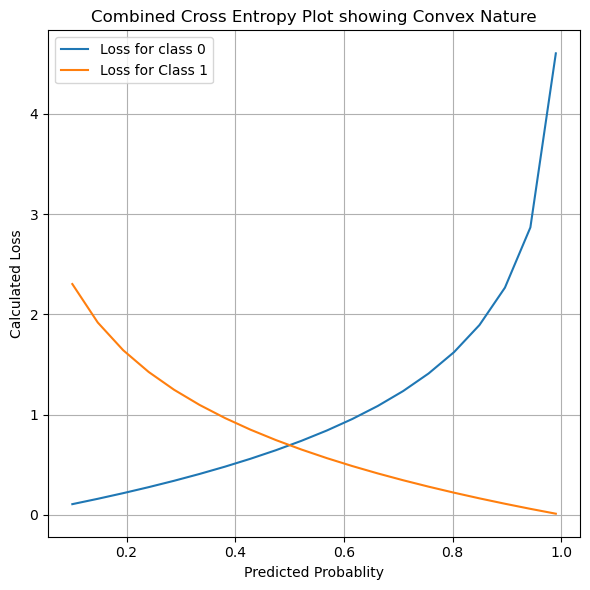

In [5]:
plt.figure(figsize=(6,6))
plt.plot(df_0['estimated_probability'], df_0['calculated_loss'], label = "Loss for class 0")
plt.plot(df_1['estimated_probability'], df_1['calculated_loss'], label = 'Loss for Class 1')
plt.xlabel("Predicted Probablity")
plt.ylabel("Calculated Loss")
plt.title("Combined Cross Entropy Plot showing Convex Nature")
plt.grid() 
plt.tight_layout()
plt.legend()
plt.show()

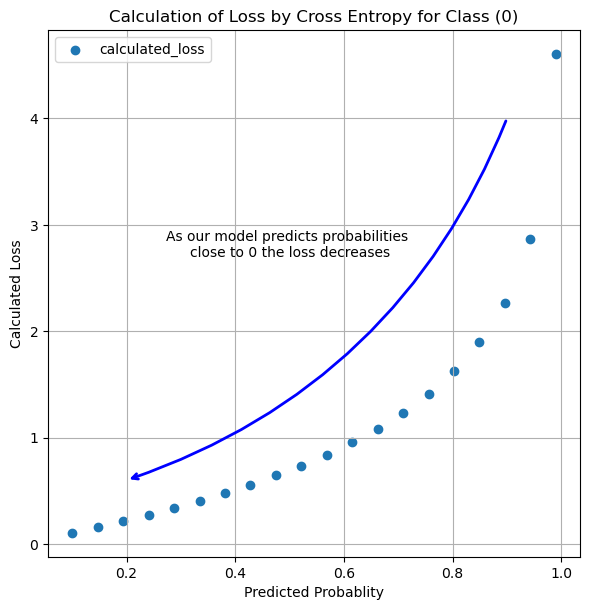

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(data= df_0, x= 'estimated_probability', y = 'calculated_loss')
plt.xlabel("Predicted Probablity")
plt.ylabel("Calculated Loss")
ax.annotate('', xy=(0.9, 4), xytext=(0.2, 0.6),
            arrowprops=dict(arrowstyle='<-', color='blue', linewidth=2,connectionstyle="arc3,rad=0.23"))
ax.text(0.5, 2.7, 'As our model predicts probabilities \nclose to 0 the loss decreases', ha='center') # this is the idea behind gradient descent so, we find the parameters that lead to the lowest loss
plt.legend()
plt.grid()
plt.tight_layout()
plt.title("Calculation of Loss by Cross Entropy for Class (0)")
plt.show()

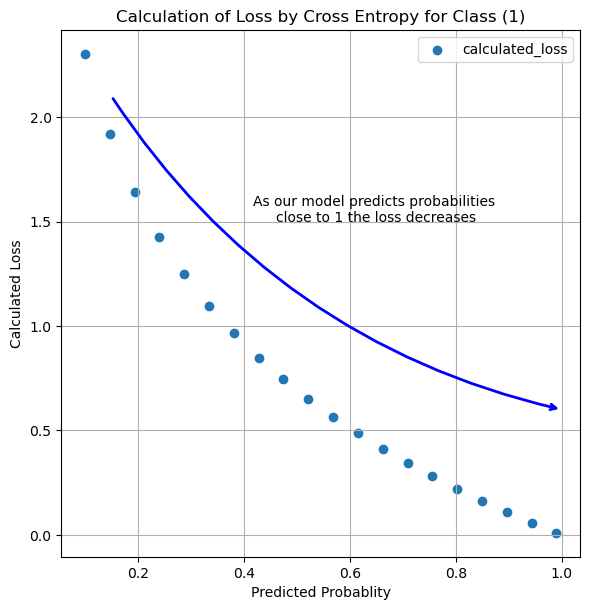

In [7]:
fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(data= df_1, x= 'estimated_probability', y = 'calculated_loss')
plt.xlabel("Predicted Probablity")
plt.ylabel("Calculated Loss")
ax.annotate('', xy=(0.15, 2.1), xytext=(1, 0.6),
            arrowprops=dict(arrowstyle='<-', color='blue', linewidth=2,connectionstyle="arc3,rad=-0.2"))

# this is the idea behind gradient descent so,
#  we find the parameters that lead to the lowest loss
ax.text(0.65, 1.5, 'As our model predicts probabilities \nclose to 1 the loss decreases', ha='center') 
plt.legend()
plt.grid()
plt.tight_layout()
plt.title("Calculation of Loss by Cross Entropy for Class (1)")
plt.show()

## **Gradient Descent**

The two figures above show us the behaviour of our loss function with various levels of predictions. We use Gradient descent to find parameters that will give us the lowest possible loss.

Gradient descent is an optimisation algorithm used to find optimal parameters of a machine learning model by minimising a convex loss/cost function. Gradient descent is used in many machine learning algorithms, such as linear regression and logistic regression. In gradient descent, we use `-` because we want to go in the opposite direction of the gradient, because this is the direction that minimises the cost function. [Intuition: Because the gradient is the change in the loss function as we change the parameters. So we must go in the opposite direction]. Mathematically, this is expressed as; 


$$ 
\theta_{n+1} = \theta_n - \eta \nabla J(\theta{_n})
$$
Where 
- $\theta_n$ is the current parameter vector
- $\theta_{n+1}$ is the updated parameter vector
- $\eta$ is the learning rate
- $\nabla J(\theta_{n})$ is gradient (derivative) of the cost function $J$ wrt parameter $
\theta$ 

*Remember, the cost function is the aggregate of the loss of all the training samples, usually the sum or average. It is commonly the average* MSE/2



|Model              |Loss Function (per training instance)|Cost Function (overall/aggregate)|Optimisation Algorithm|
|-------------------|-------------|--------------|--------|
|Linear Regression  |Squared Error|Mean Squared Error $MSE/2$ or just MSE|Gradient Descent|
|Logistic Regression|Binary Cross Entropy|Average Cross Entropy|Gradient Descent|

## **Implementation of Logistic regression model**
---
Now that we have seen how to find optimal parameters for our model. How do we build a model and make predictions?

For logistic regression, given the following from a dataset D,
- Feature Matrix, $X \in \mathbb{R}^{n \times p}$ 
- Target Label, $\text{y} \in \mathbb{R}^{n \times 1}$ 

Where 
- $n$ = number of training instances 
- $p$ = number of predictors(features).

We initialise
- Weight Matrix $\text{W} \in \mathbb{R}^{p \times 1}$
- Bias term $b$

Then, we follow the steps below:

1. Compute the logit, $z =  (X \times W) + b$
2. Pass logit into the sigmoid function $\sigma(z)$ to make  prediction where $$\sigma(z) = \frac{1}{1+e^{-z}}$$

3. Set Decision Boundary (usually (0.5)) to predict the class based on the estimated probability. The sigmoid function estimates the probability, $\hat{y}$ that an instance belongs to class (1) such that 

$$
y = 
\begin{cases}
1 & \text{if } \hat{y} \geq 0.5 \\
0 & \text{if } \hat{y} < 0.5
\end{cases}
$$

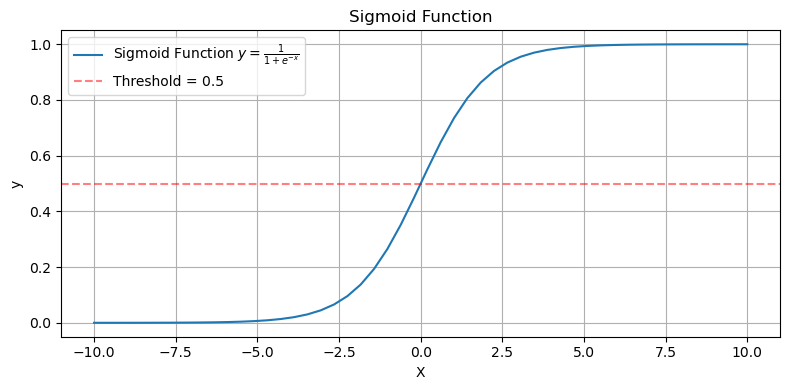

In [8]:
# Visualisation of Sigmoid Function
def sigmoid(z):
    """ Sigmoid Function"""
    return 1/(1+np.exp(-z))

# Visualisation of Sigmoid Function
x_sigmoid = np.linspace(-10,10)
y_sigmoid = sigmoid(x_sigmoid)
plt.figure(figsize=(8,4))
plt.plot(x_sigmoid,y_sigmoid, label = r'Sigmoid Function $ y = \frac{1}{1+e^{-x}}$')
plt.grid()
plt.axhline(0.5, linestyle = '--', label = 'Threshold = 0.5', c='r', alpha = 0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title("Sigmoid Function")
plt.legend(frameon = True)
plt.tight_layout()
plt.show()

# as you can see it squeezes logit to fall between 0 and 1

## **Code Implementation of Gradient Descent**
---

In [9]:
class LogisticReg: 

    def __init__(self,X, random_state = None, unfitted = True):
        self.X = X
        self.unfitted = unfitted
        self.random_state = random_state # This comes before the self.weight, bias because it has to exist before params can be init
        self.weight, self.bias = self.init_params()
        self.logit = self.compute_logit()



        
    #step 1. Init weight and bias w(pX1)
    def init_params(self):
        """
        Initialises the parameters for our model. The parameters are the Weight Matrix and bias. 

        Parameters
        ----------
            X: array-like (n x p)
                Feature matrix:
                - n: number of train samples
                - p: number of predictors
        
        """
        # we set the random state to ensure consistent initialisation
        if self.random_state is not None:
            np.random.seed(random_state)

        p=self.X.shape[1]
        weight=np.random.randn(p,1) 
        bias=np.random.randn(1)
        return weight,bias

    # Step 2 compute the logit (z)
    def compute_logit(self):
        """
        Computes logit, which we will pass into the sigmoid function to get the estimated probability.
        """
        self.logit = np.matmul(self.X,self.weight) + self.bias
        return self.logit

    # step 3. get estimated probability 
    #Calculate the error then upload it 
    def sigmoid(self):
        """ Sigmoid Function"""
        return 1/(1+np.exp(-self.logit))
    
# This should be under fit tho
    def predict_proba(self):
        """
        Computes estimated probability using sigmoid.

        Returns
        -------
            estimated probability
        """
        self.compute_logit()
        y_hat_proba = self.sigmoid()
        return y_hat_proba


    def predict(self,threshold=0.5):
        """
        Makes prediction using threshold.
        """
        y_proba = self.predict_proba()
        y_hat = [1 if proba>=threshold else 0 for proba in y_proba]
        return y_hat
    

        #
    def batch_grad_descent(self,y,learning_rate=0.01,epoch=60, verbose = True):
        self.unfitted = False
        n = self.X.shape[0]
        y = y.reshape(-1,1) # Always ensure that you include measures to enforce appropriate shapes for parameters (X,y etc)
        # firstly init_weights and bias
        cost_history = []
        for i in range(epoch): 

            # make predictions
            y_hat_proba = self.predict_proba() 
            error = y_hat_proba - y
            
            # compute gradients
            weight_gradient = np.matmul(self.X.T, error)/n 
            bias_gradient  = np.sum(error)/n
            # Implement gradient descent 
            
            self.weight = self.weight - (learning_rate* weight_gradient)
            self.bias = self.bias - (learning_rate* bias_gradient)
            cost = np.sum(-(y*np.log(y_hat_proba+1e-2)) -(1-y)*np.log(1-y_hat_proba+1e-2))
            
            # update cost history
            cost_history.append(cost)
            if verbose is True and i%5 == 0:
                print('='*50)
                print(f"epoch {i+1}, weights:{self.weight.ravel()}, bias: {self.bias}")


        return {
            'weights':self.weight, 
            "bias": self.bias,
            "cost_history":cost_history
            }
    
    def make_pred(self):
        if self.unfitted: # meand if self.unfitted is True
            return "Model is not yet fitted"
        else:
            return self.predict()
    
# separate the running of the code from the appending of updates

## **Experimentation on Datasets**
---

We shall use the implemented logistic regression model and sklearn logreg on 
1. Iris Dataset
2. Breast Cancer Dataset

We will be using two features so that we can visualise the boundary.

### **IRIS dataset**

In [10]:
# load_iris dataset
iris = load_iris()
X_iris = iris.data[:, :2]  # Use first two features: sepal length and width
y_iris = iris.target

# Use only classes 0 (Setosa) and 1 (Versicolor)
binary_filter = y_iris < 2 

X_iris = X_iris[binary_filter]
y_iris = y_iris[binary_filter]


# sklearn clf
sk_clf = LogisticRegression(random_state=random_state,max_iter=110)
sk_clf.fit(X_iris,y_iris)
sk_pred_lr = sk_clf.predict(X_iris)
print(f"="*100)
print("SKLEARN")
print(classification_report(y_iris, sk_pred_lr))
# load our clf
our_lr = LogisticReg(X=X_iris,random_state=random_state)
our_lr.batch_grad_descent(y_iris, verbose= False, epoch=100)
our_pred_lr = our_lr.make_pred()
print('\n'*2)
print(f"="*100)
print("OUR PRED")
print(classification_report(y_iris, our_pred_lr))



SKLEARN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100




OUR PRED
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Even though overfitting is obvious, our implementation achieves a similar performance to sklearn. This is probably because the classes are linearly separable.

### Plotting Decision Boundary
---

In [30]:
def plot_boundary(X,y,weight_matrix, bias):
    """
    Plots Decision Boundary. Works for just two features
    """

    
    w_1 = weight_matrix[0]
    w_2 = weight_matrix[1]
    b = bias

    x_2 = X[:, 1]
    x_1 = -(w_2*x_2 + b)/w_1
    
    sns.scatterplot(x = X[:,0], y=  X[:,1], hue = y)
    plt.plot(x_1,x_2,c = 'red', label = "Decision Boundary")
    plt.tight_layout()
    plt.legend()
  


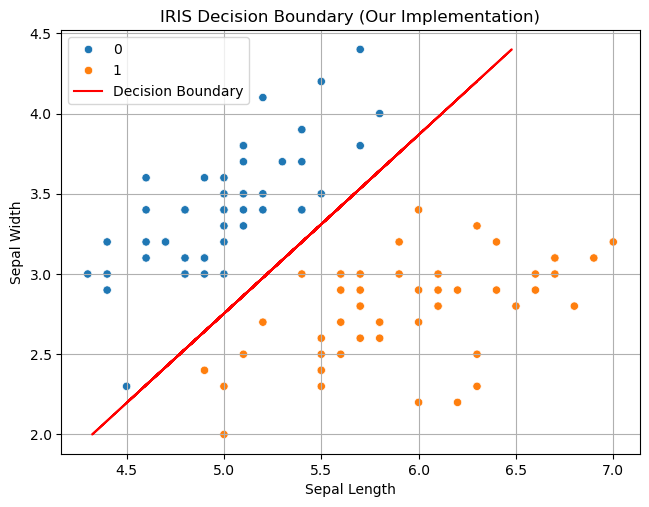

In [35]:
plot_boundary(X_iris,y_iris, weight_matrix=our_lr.weight, bias=our_lr.bias)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('IRIS Decision Boundary (Our Implementation)')
plt.grid()
plt.show()


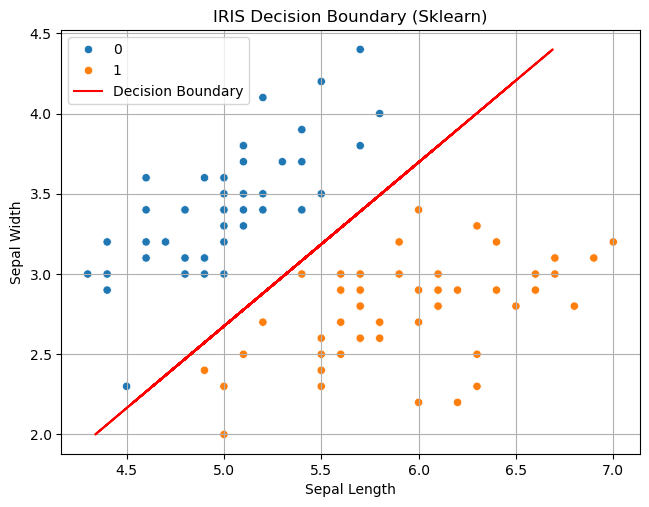

In [34]:
plot_boundary(X_iris,y_iris, weight_matrix=sk_clf.coef_.ravel(), bias=sk_clf.intercept_)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid()
plt.title('IRIS Decision Boundary (Sklearn)')
plt.show()



### **Cancer Dataset**
---

In [15]:
# load the dataset
cancer_data = load_breast_cancer()
y_cancer = cancer_data.target
X_cancer = cancer_data.data[:,:2] # just first two features, mean radius and mean texture

# sklearn clf
sk_clf_cancer = LogisticRegression(random_state=random_state,max_iter=110)
sk_clf_cancer.fit(X_cancer,y_cancer)
sk_pred_cancer = sk_clf_cancer.predict(X_cancer)

print(f"="*100)
print("SKLEARN CANCER")
print(classification_report(y_cancer, sk_pred_cancer))

# load our clf
our_lr_cancer = LogisticReg(X=X_cancer,random_state=random_state)
cancer_results = our_lr_cancer.batch_grad_descent(y_cancer, verbose= False, epoch=100)
our_pred_cancer = our_lr_cancer.make_pred()
print('\n'*2)
print(f"="*100)
print("OUR PRED")
print(classification_report(y_cancer, our_pred_cancer))

SKLEARN CANCER
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       212
           1       0.90      0.94      0.92       357

    accuracy                           0.89       569
   macro avg       0.89      0.88      0.88       569
weighted avg       0.89      0.89      0.89       569




OUR PRED
              precision    recall  f1-score   support

           0       0.33      0.26      0.29       212
           1       0.61      0.68      0.64       357

    accuracy                           0.52       569
   macro avg       0.47      0.47      0.47       569
weighted avg       0.50      0.52      0.51       569



Unsurprisingly, our model is not as good as Sklearn's but you get the general idea. Lets check how the cost evolved by epoch

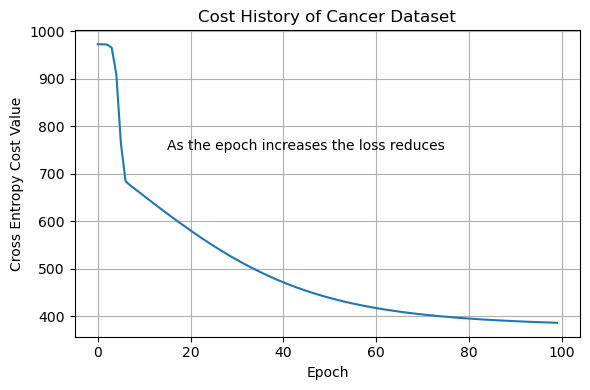

In [16]:
plt.figure(figsize=(6,4))
plt.plot(np.arange(len(cancer_results["cost_history"])),cancer_results["cost_history"])
plt.annotate(text="As the epoch increases the loss reduces ",xy=(15,750),)
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy Cost Value")
plt.title("Cost History of Cancer Dataset")
plt.grid()
plt.tight_layout()
plt.show()

### **Plotting the Decision Boundary**
---

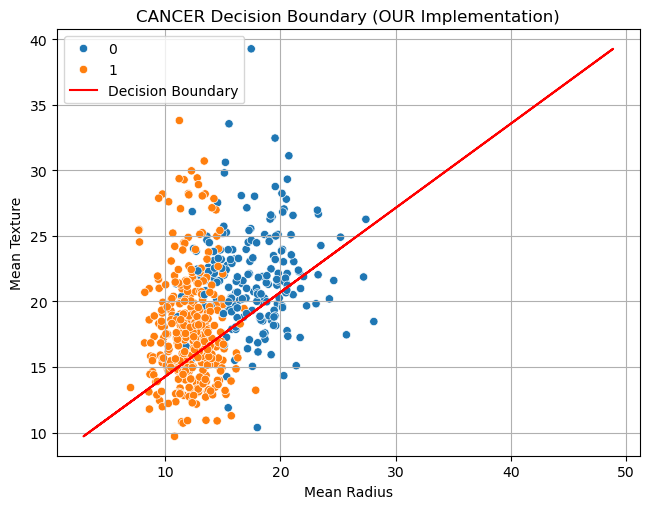

In [36]:
# just first two features, mean radius and mean texture sk_clf_cancer our_lr_cancer
plot_boundary(X_cancer,y_cancer, weight_matrix=our_lr_cancer.weight, bias=our_lr_cancer.bias)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('CANCER Decision Boundary (OUR Implementation)')
plt.grid()
plt.show()



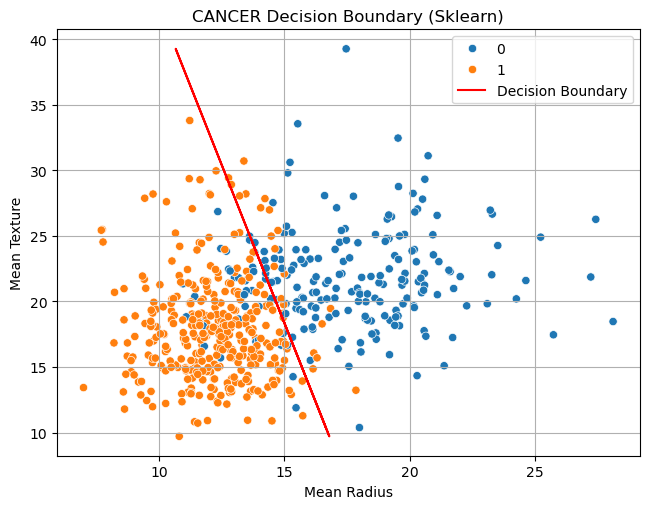

In [37]:
# just first two features, mean radius and mean texture sk_clf_cancer our_lr_cancer
plot_boundary(X_cancer,y_cancer, weight_matrix=sk_clf_cancer.coef_.ravel(), bias=sk_clf_cancer.intercept_)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('CANCER Decision Boundary (Sklearn)')
plt.grid()
plt.show()



In [19]:
# as shown above our model has a 40% accuracy
#  which is quite poor, this is because we used randomly initialised 
# params, now we must update it with an optimisation algorithm. such as gradient descent

In [20]:
# now that we understand the behaviour of the loss function whenever we make predictions using different weights and bias
# traditionally, we represent the parameters W, b as \theta
# so now after we get the loss the next step is to update the paramaters using gradient descent algorithm  

# Gradient Descent